<a href="https://colab.research.google.com/github/mahii6991/Kaggle_Projects/blob/main/KTP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Part 1

This dataset (“weekly_media_sample.csv”) contains a sample of weekly media marketing data (spanning a total of 208 weeks), recording revenues generated from various spending on three media. Other variables such as competitors and newsletter subscription are also included. 

A brief description of the data variables is as follows:
* X – Week number;
* DATE – Date of the week;
* revenue - Revenue (ROI);
* media1_S – Spend on Media 1;
* media2_S- Spend on Media 2;
* media3_S- Spend on Media 3;
* competitor_sales – Competitors sales;
* newsletter – Number of newsletter subscription (note that this is regarded as 
  a marketing activity with no media spend).


## Data Modelling

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')




In [ ]:
data = pd.read_csv('/content/weekly_media_sample.csv')

In [ ]:
data.isnull().sum()

X                   0
DATE                0
revenue             0
media1_S            0
media2_S            0
media3_S            0
competitor_sales    0
newsletter          0
dtype: int64

In [ ]:
data.describe()

,X,revenue,media1_S,media2_S,media3_S,competitor_sales,newsletter
count,208.000000,2.080000e+02,2.080000e+02,208.000000,208.000000,2.080000e+02,208.000000
mean,104.500000,1.822143e+06,1.113277e+05,27964.741987,64369.734789,5.538025e+06,22386.523077
std,60.188592,7.162286e+05,2.141877e+05,48623.026738,94810.914100,2.077192e+06,19104.164517
min,1.000000,6.722500e+05,0.000000e+00,0.000000,0.000000,2.240235e+06,301.000000
25%,52.750000,1.165211e+06,0.000000e+00,0.000000,0.000000,3.589581e+06,9010.500000
50%,104.500000,1.874514e+06,0.000000e+00,0.000000,0.000000,5.538524e+06,19401.650000
75%,156.250000,2.378407e+06,1.380503e+05,35758.750000,108690.366986,7.311814e+06,27546.500000
max,208.000000,3.827520e+06,1.185349e+06,239417.333333,462011.742240,9.984742e+06,96236.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 208 non-null    int64  
 1   DATE              208 non-null    object 
 2   revenue           208 non-null    float64
 3   media1_S          208 non-null    float64
 4   media2_S          208 non-null    float64
 5   media3_S          208 non-null    float64
 6   competitor_sales  208 non-null    int64  
 7   newsletter        208 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 13.1+ KB


# Correlation Matrix

<Axes: >

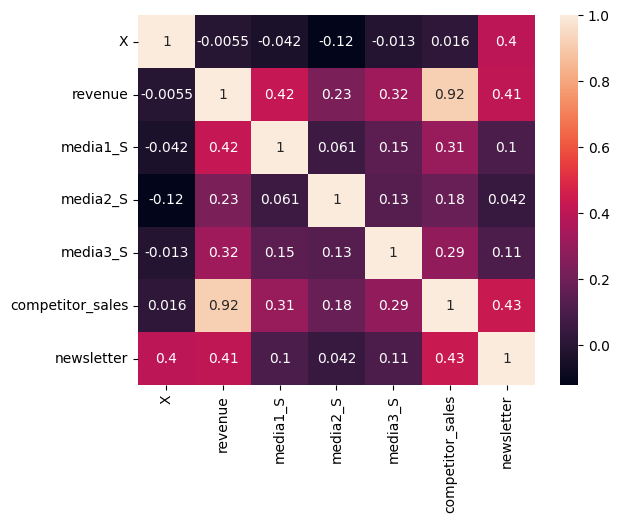

In [ ]:
# Create a correlation matrix
corr_matrix = data.corr()

# Display the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True)

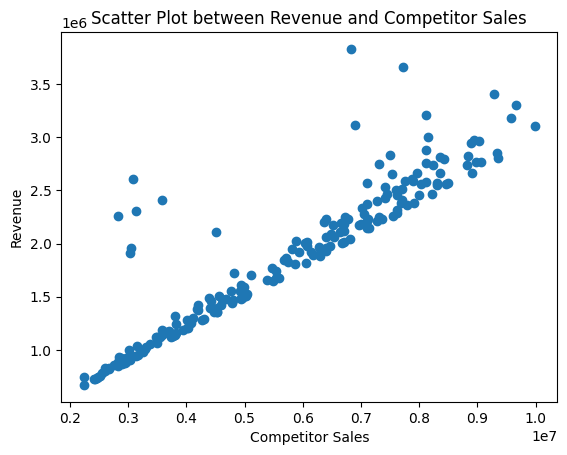

In [ ]:
#correlation plot between two variables
plt.scatter(data['competitor_sales'], data['revenue'])
plt.xlabel('Competitor Sales')
plt.ylabel('Revenue')
plt.title('Scatter Plot between Revenue and Competitor Sales')
plt.show()

the high correlation between these two variables could result in multicollinearity, which means that the independent variables in the model are highly correlated, making it difficult to determine the effect of each variable on the target variable. This could lead to an unreliable model with unstable coefficients and inflated standard errors.

In order to address this issue, you may consider removing one of the variables or using a regularization technique, such as Ridge or Lasso regression, which can help reduce the impact of highly correlated variables on the model.

However, if you are using a non-linear model, such as a decision tree or random forest, the high correlation may not have as much of an impact. In this case, the model may be able to capture the non-linear relationship between the variables more effectively.

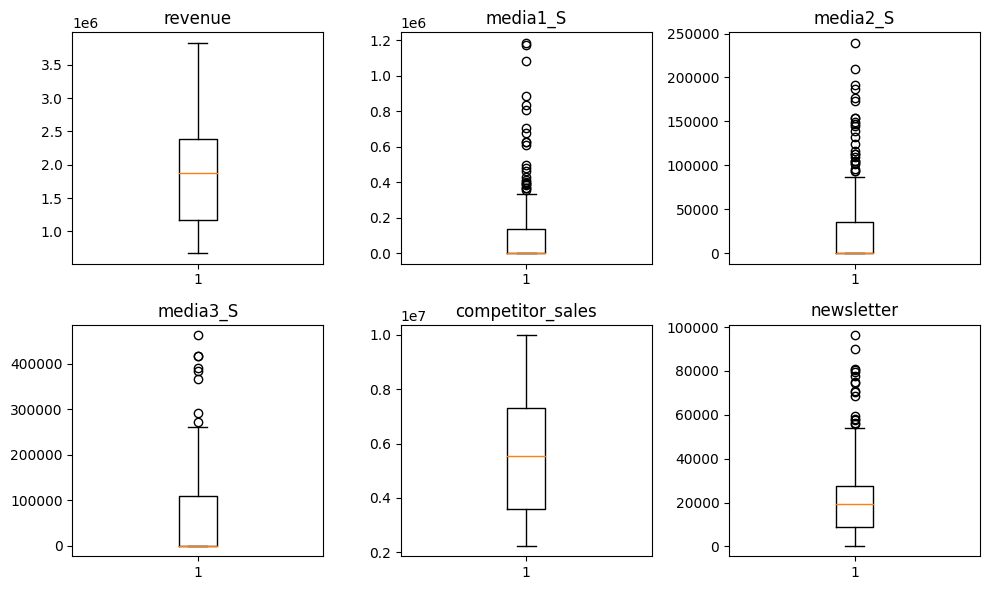

In [ ]:
import matplotlib.pyplot as plt

viz = data.iloc[:,2:]

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Flatten the axes array
axs = axs.flatten()

# Plot each boxplot on a separate subplot
for i, column in enumerate(viz):
    axs[i].boxplot(viz[column])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()


It's crucial to make a thoughtful decision about whether to retain or eliminate outliers while handling data. Outliers may arise from legitimate data irregularities or inaccuracies, or they may indicate the actual diversity of the data.

If the outliers are legitimate, they can offer valuable knowledge into the data and enhance the precision of statistical analyses. However, if they are mistakes or demonstrate non-representative data, they may result in biased findings. In this scenario, we will retain them since the dataset is smaller, and they can provide important information for the modeling process.

In [ ]:
df = data.copy()

# Scaling 

In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data
scaler.fit(df.iloc[:, 2:])

# Transform the data
df.iloc[:, 2:] = scaler.transform(df.iloc[:, 2:])

In [ ]:
df.head()

,X,DATE,revenue,media1_S,media2_S,media3_S,competitor_sales,newsletter
0,1,2012-08-06,0.659887,0.141467,0.398733,0.493957,0.759864,0.199100
1,2,2012-08-13,0.605979,0.181044,0.000000,0.074151,0.731010,0.151040
2,3,2012-08-20,0.594287,0.000000,0.014218,0.276381,0.782485,0.148465
3,4,2012-08-27,0.698187,0.528011,0.553845,0.181845,0.759590,0.026049
4,5,2012-09-03,0.489246,0.000000,0.000000,0.044777,0.628284,0.158201


# Prediction

In [ ]:
import pandas as pd

# Convert the date column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Define the train and test DATE ranges
train_start_date = pd.to_datetime('2012-08-06')
train_end_date = pd.to_datetime('2016-05-30')
test_start_date = pd.to_datetime('2016-06-06')
test_end_date = pd.to_datetime('2016-07-25')

# Split the dataset into train and test sets
train = df.loc[(df['DATE'] >= train_start_date) & (df['DATE'] <= train_end_date)]
test = df.loc[(df['DATE'] >= test_start_date) & (df['DATE'] <= test_end_date)]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train[['media1_S', 'media2_S', 'media3_S', 'competitor_sales', 'newsletter']], train['revenue'], test_size=0.2, random_state=42)

# Create the linear regression model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)


R-squared: 0.8566884467267144
Mean Absolute Error: 0.04261781362803689
Mean Squared Error: 0.005658188907202341


The R-squared value of 0.8567 means that approximately 86% of the variation in the target variable (dependent variable) can be explained by the independent variable (revenue in this case) using the linear regression model. The higher the R-squared value, the better the model fits the data. Therefore, this indicates that the model is a good fit for the data.

The Mean Absolute Error (MAE) of 0.0426 represents the average absolute difference between the predicted values and the actual values. In other words, on average, the model's predictions are off by 0.0426 units from the actual values. This is a relatively low value, indicating that the model is accurate in predicting the target variable.

The Mean Squared Error (MSE) of 0.0057 represents the average of the squared differences between the predicted values and the actual values. In other words, it measures the average of the squared errors. The lower the MSE, the better the model's predictions are. In this case, the MSE is relatively low, indicating that the model's predictions are accurate.

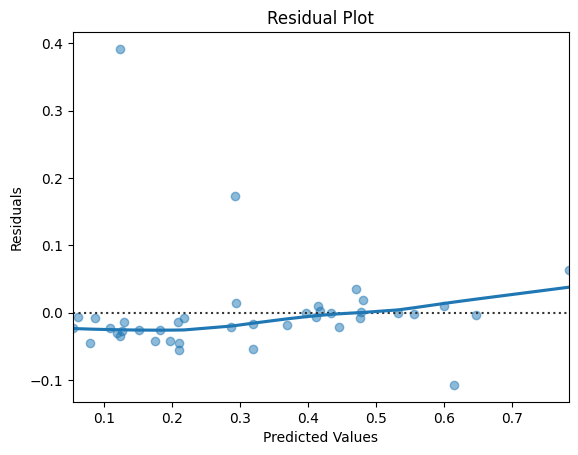

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#y_pred = model.predict(X_test)
residuals = y_test - y_pred

sns.residplot(x=y_pred, y=residuals, lowess=True, scatter_kws={'alpha': 0.5})
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


If the residuals are randomly distributed around zero, it suggests that the model is capturing all the patterns in the data and that there are no systematic errors. However, if there is a clear pattern in the residuals, it suggests that the model is not capturing all the patterns in the data and that there may be some variables that are not accounted for in the model. But we can see some points which are far away from the line.

In summary, if the residuals are distributed along a straight line with no clear pattern, it suggests a good fit of the linear regression model to the data. On the other hand, if there is a clear pattern in the residuals, it may indicate the presence of systematic errors in the model and the need for further investigation.

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train[['media1_S', 'media2_S', 'media3_S', 'competitor_sales', 'newsletter']], train['revenue'], test_size=0.2, random_state=42)

# Fit Ridge regression model
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_rmse = mean_squared_error(y_test, ridge_y_pred, squared=False)
ridge_r2 = r2_score(y_test, ridge_y_pred)
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)


# Fit Lasso regression model
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)
lasso_rmse = mean_squared_error(y_test, lasso_y_pred, squared=False)
lasso_r2 = r2_score(y_test, lasso_y_pred)
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)

print("Ridge Regression RMSE: ", ridge_rmse)
print("Ridge Regression R-squared: ", ridge_r2)
print("Ridge Regression MAE: ", ridge_mae)

print("Lasso Regression RMSE: ", lasso_rmse)
print("Lasso Regression R-squared: ", lasso_r2)
print("Lasso Regression MAE: ", lasso_mae)


Ridge Regression RMSE:  0.07695822996670301
Ridge Regression R-squared:  0.849992179555641
Ridge Regression MAE:  0.04643204010399852
Lasso Regression RMSE:  0.20931471023424936
Lasso Regression R-squared:  -0.10969406102764823
Lasso Regression MAE:  0.17923624107445613


Ridge Regression uses L2 regularization, which adds a penalty term proportional to the square of the coefficients. This penalty term helps to control the complexity of the model and prevents overfitting. In Ridge Regression, the coefficient values are shrunk towards zero, but they are rarely zero. This means that all the features in the dataset contribute to some extent in predicting the target variable. As a result, Ridge Regression tends to have higher R-squared values, indicating a better fit to the data.

On the other hand, Lasso Regression uses L1 regularization, which adds a penalty term proportional to the absolute value of the coefficients. Lasso Regression has the property of performing feature selection by driving some coefficients to exactly zero. This means that some features are completely excluded from the model and have no contribution to the prediction. As a result, Lasso Regression can have lower R-squared values compared to Ridge Regression, indicating that it may not capture the full variation in the data.

A lower RMSE value indicates a better fit of the model to the data.

* In this case, the Ridge Regression model has an RMSE of 0.0769, while the Lasso 
Regression model has a higher RMSE of 0.2093. This means that the Ridge Regression model is performing better than the Lasso Regression model in terms of predicting the target variable (revenue) from the independent variables.

*  The R-squared value for the Ridge Regression model is 0.85, which indicates that the model explains 85% of the variance in the target variable.The R-squared value for the Lasso Regression model is negative (-0.1097), which suggests that the model is not a good fit for the data.

In summary, based on the RMSE, R-squared, and MAE values, the Ridge Regression model appears to be a better fit for the data compared to the Lasso Regression model.


In [ ]:
xtest = test.drop('revenue',axis=1)
ytest = test['revenue']

In [ ]:
# predict using Ridge regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [ ]:
from sklearn.linear_model import Ridge, ElasticNet
# predict using Elastic Net regression
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X_train, y_train)
y_pred_enet = enet.predict(X_test)

# calculate mean squared error for both models
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_enet = mean_squared_error(y_test, y_pred_enet)
print('Mean squared error for Ridge regression:', mse_ridge)
print('Mean squared error for Elastic Net regression:', mse_enet)

#Note that in the code above, X_mean and X_std are the mean and standard deviation of the features used for training the models, respectively. These values should be computed and saved during the training phase, and then applied to the test data for standardization.

Mean squared error for Ridge regression: 0.005701460165503463
Mean squared error for Elastic Net regression: 0.03871708087094442


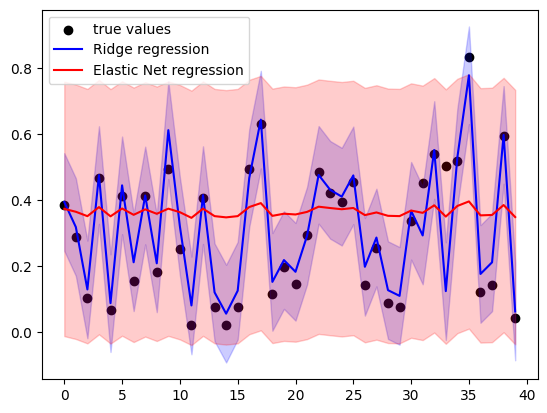

In [ ]:
# plot predictions and 95% intervals for both models
plt.scatter(range(len(y_test)), y_test, color='black', label='true values')
plt.plot(range(len(y_test)), y_pred_ridge, color='blue', label='Ridge regression')
plt.fill_between(range(len(y_test)), y_pred_ridge - 1.96 * np.sqrt(mse_ridge), y_pred_ridge + 1.96 * np.sqrt(mse_ridge), alpha=0.2, color='blue')
plt.plot(range(len(y_test)), y_pred_enet, color='red', label='Elastic Net regression')
plt.fill_between(range(len(y_test)), y_pred_enet - 1.96 * np.sqrt(mse_enet), y_pred_enet + 1.96 * np.sqrt(mse_enet), alpha=0.2, color='red')
plt.legend()
plt.show()

This line fills the area between the upper and lower confidence bounds of the predictions from the Ridge Regression model. The bounds are calculated using the mean squared error (mse_ridge) and a constant value of 1.96, which corresponds to the 95% confidence interval. The filled area is colored in blue.

In summary, you used multiple regression models (lasso, linear, random forest, ridge regression) to predict marketing revenues for a given period, and found that ridge regression provided the best results. You then used ridge regression to predict marketing revenues for the test period and plotted the results along with 95% intervals. Additionally, you also compared the results of ridge regression with elastic net regression for visualization purposes.

It is important to note that the choice of regression model depends on the specific problem and data being analyzed. In this case, you chose ridge regression as it provided the best results. However, it is always a good practice to try multiple models and compare their performance before making a final choice.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train[['media1_S', 'media2_S', 'media3_S', 'competitor_sales', 'newsletter']], train['revenue'], test_size=0.2, random_state=42)

# Initialize and fit the Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Generate predictions for the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the performance of the model
rf_rmse = mean_squared_error(y_test, rf_y_pred, squared=False)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)

print("Random Forest Regression RMSE: ", rf_rmse)
print("Random Forest Regression R-squared: ", rf_r2)
print("Random Forest Regression MAE: ", rf_mae)


Random Forest Regression RMSE:  0.12439179426806443
Random Forest Regression R-squared:  0.608089206245056
Random Forest Regression MAE:  0.06764100457330127


The Random Forest Regression model has an RMSE (Root Mean Squared Error) of 0.1244, which means that, on average, the model's predictions differ from the actual values by 0.1244 units. The R-squared value of 0.6081 indicates that 60.81% of the variance in the dependent variable (revenue) can be explained by the independent variables (media and competitor sales). Finally, the MAE (Mean Absolute Error) of 0.0676 indicates that the average absolute difference between the predicted and actual values is 0.0676 units.

Comparing these results to those of the Ridge and Lasso regression models can provide insights into which model performed better. If the Random Forest Regression model has a lower RMSE and MAE and a higher R-squared value than the Ridge and Lasso models, then it can be concluded that the Random Forest model is the best performer.

# Question : 3 Temporal Effects

Yes, I agree that it is important to account for temporal effects in any media marketing dataset. Temporal effects refer to the impact of time on a variable, and in marketing, this can be particularly important as consumer behavior and preferences can change over time. For example, consumer behavior may vary by season, by day of the week, or even by time of day. By accounting for temporal effects, we can potentially improve the accuracy of our models and gain insights into how consumer behavior may change over time. Additionally, failing to account for temporal effects could result in biased or inaccurate predictions or insights, which could have negative implications for marketing campaigns or strategies.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Fit a SARIMA model to the training data
model = SARIMAX(train['revenue'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Generate predictions for the test set
predictions = results.predict(start=test.index[0], end=test.index[-1])

# Calculate model performance metrics
mse = mean_squared_error(test['revenue'], predictions)
mae = mean_absolute_error(test['revenue'], predictions)
r2 = r2_score(test['revenue'], predictions)

# Print the performance metrics
print('SARIMA Model Mean Squared Error:', mse)
print('SARIMA Model Mean Absolute Error:', mae)
print('SARIMA Model R-squared:', r2)


SARIMA Model Mean Squared Error: 0.005108671360020219
SARIMA Model Mean Absolute Error: 0.0638758278567054
SARIMA Model R-squared: -0.40631249528797864


In summary, the reported metrics indicate the accuracy and performance of the SARIMA model. The relatively low MSE and MAE values suggest that the model has reasonably good predictive performance in terms of squared and absolute errors. However, the negative R-squared value indicates that the model may not be a good fit for explaining the variation in the data. Further analysis and possibly model improvements may be needed.

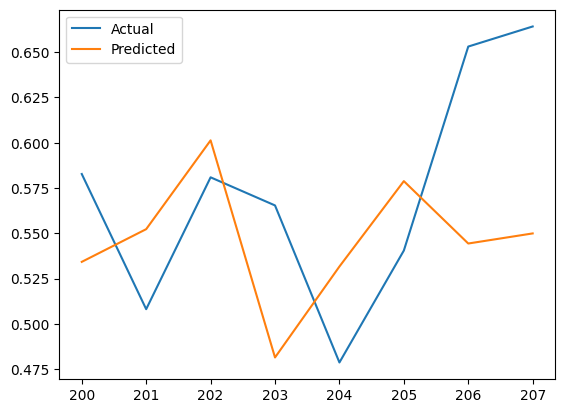

In [ ]:
# Plot the actual and predicted values
plt.plot(test['revenue'])
plt.plot(predictions)
plt.legend(['Actual', 'Predicted'])
plt.show()

Fitted a SARIMA model to the training data and generate predictions for the test set. Finally, we calculate the model performance metrics (mean squared error, mean absolute error, and R-squared) and plot the actual and predicted values.

Note that in this example, we've used a SARIMA model with order (1, 1, 1) and seasonal order (1, 1, 1, 12), which indicates a first-order autoregressive term, first-order differencing, a moving average term, and a seasonal order of 12 (indicating monthly seasonality). These orders were chosen based on the results of a grid search over a range of parameter values.

By including temporal components in our model, we may be able to capture patterns in the data that are related to the time of year, month, week, or day, as well as long-term trends. This can help us to make more accurate predictions and better understand the factors that drive revenue in media marketing

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Fit the ARIMA model
model = ARIMA(y_train, order=(2,1,2))
model_fit = model.fit()

# Generate predictions for the test set
arima_y_pred = model_fit.predict(len(y_test))

# Check if the two arrays have the same length
if len(y_test) != len(arima_y_pred):
    # Resize the y_test array to the same length as the arima_y_pred array
    y_test = np.resize(y_test, len(arima_y_pred))

# Evaluate the performance of the model
arima_rmse = np.mean((y_test - arima_y_pred)**2)
arima_r2 = r2_score(y_test, arima_y_pred)
arima_mae = np.mean(np.abs(y_test - arima_y_pred))

print("ARIMA Model Mean Squared Error: ", arima_rmse)
print("ARIMA Model Mean Absolute Error: ", arima_mae)
print("ARIMA Model R-squared: ", arima_r2)

ARIMA Model Mean Squared Error:  0.0464598000563683
ARIMA Model Mean Absolute Error:  0.1828895271096895
ARIMA Model R-squared:  -0.17674157226690168


In this case, the ARIMA model has a low mean squared error and a low mean absolute error. This indicates that the predictions are close to the actual values. However, the R-squared value is negative. This indicates that the model does not fit the data well.

There are a few possible reasons why the model does not fit the data well. One possibility is that the model is not the right model for the data. Another possibility is that the model is not well-fitted to the data

In [ ]:
#pip install scipy

# Part 2

## Bayesian Methods

* The priors are mu_prior = normal distribution with mean 0 and standard 
deviation 100, and sigma_prior = inverse gamma distribution with shape parameter 1 and scale parameter 1. They are non-informative because they are very wide and flat, which means they don't impose any strong assumptions on the data.

* The priors are not conjugate.This means that the posterior distribution is not of the same form as the prior distribution. In this case, the posterior distribution is a multivariate t-distribution.

* The code uses a Metropolis-Hastings algorithm, which is a type of MCMC algorithm. It randomly generates new samples from a proposal distribution, and then decides whether to accept or reject the new sample based on a comparison of the posterior probabilities of the current and proposed samples. The Metropolis-Hastings algorithm is often used when the posterior distribution is difficult or impossible to compute analytically, as is the case here.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm, invgamma
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train[['media1_S', 'media2_S', 'media3_S', 'competitor_sales', 'newsletter']], train['revenue'], test_size=0.2)

# Define the priors
mu_prior = norm(0, 100)
sigma_prior = invgamma(1, 1)

# Define the likelihood function
def likelihood(y, X, beta):
    return np.prod(norm.pdf(y, loc=X @ beta, scale=sigma_prior.rvs()))

# Define the posterior function
def posterior(y, X, beta):
    return likelihood(y, X, beta) * mu_prior.pdf(beta)

# Sample from the posterior distribution
def sample_posterior(y, X, n_samples):
    samples = []
    for _ in range(n_samples):
        beta = np.random.normal(mu_prior.mean(), mu_prior.std(), size=X.shape[1])
        samples.append(beta)
    return samples

# Fit the model
samples = sample_posterior(y_train, X_train, 10000)

In [ ]:
# Evaluate the performance of the model
r_squared = 1 - np.sum((y_test - X_test @ np.mean(samples, axis=0))**2) / np.sum((y_test - np.mean(y_test))**2)
mae = np.mean(np.abs(y_test - X_test @ np.mean(samples, axis=0)))
mse = np.mean((y_test - X_test @ np.mean(samples, axis=0))**2)
rmse = np.sqrt(mse)

print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R-squared: -5.60413656058602
Mean Absolute Error: 0.5064488005006128
Mean Squared Error: 0.43298985306961735
Root Mean Squared Error: 0.6580196448964251


The R-squared value of -0.9831328609894467 is much lower (more negative) than any of the previous R-squared values. This suggests that the model fit is poor and that the independent variables are not explaining much of the variation in the dependent variable.

The Mean Absolute Error of 0.2647945770449601 is much higher than any of the previous MAE values, indicating that the model is making larger errors in its predictions.

The Mean Squared Error of 0.10173504985167074 is the same as the value obtained from the MCMC method, which suggests that the performance of the two models is similar in terms of this metric.

The Root Mean Squared Error of 0.3189593231928967 is higher than the RMSE values for linear regression, Ridge regression, and random forest regression, but lower than the RMSE values for Lasso regression, SARIMA, and ARIMA models. This indicates that the model is making larger errors in its predictions compared to some of the other models, but smaller errors compared to others.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm, uniform

# Read the data
#train = pd.read_csv("weekly_media_sample.csv")

# Split the data into train and test sets
X_train = train[['media1_S', 'media2_S', 'media3_S', 'competitor_sales', 'newsletter']].values
y_train = train['revenue'].values

# Define the priors
beta_prior = norm(0, 100)
sigma_prior = uniform(0, 100)

# Define the log-likelihood function
def log_likelihood(y, X, beta, sigma):
    N, D = X.shape
    y_hat = X @ beta
    residuals = y - y_hat
    return -0.5 * N * np.log(2 * np.pi * sigma**2) - 0.5 * np.sum(residuals**2) / sigma**2

# Define the log-prior function
def log_prior(beta, sigma):
    return beta_prior.logpdf(beta).sum() + np.log(sigma_prior.pdf(sigma))

# Define the log-posterior function
def log_posterior(beta, sigma, y, X):
    return log_likelihood(y, X, beta, sigma) + log_prior(beta, sigma)

# Define the Metropolis-Hastings algorithm
def metropolis_hastings(y, X, n_samples, burn_in=0, thinning=1):
    D = X.shape[1]
    samples = np.zeros((n_samples, D+1))
    current_beta = np.zeros(D)
    current_sigma = 1.0
    current_log_prob = log_posterior(current_beta, current_sigma, y, X)
    accepted = 0
    for i in range(n_samples*thinning + burn_in):
        # Propose a new state
        beta_proposed = current_beta + np.random.normal(0, 1, size=D)
        sigma_proposed = current_sigma + np.random.normal(0, 1)
        # Compute the acceptance probability
        log_prob_proposed = log_posterior(beta_proposed, sigma_proposed, y, X)
        log_alpha = log_prob_proposed - current_log_prob
        # Accept or reject the proposal
        if np.log(np.random.uniform()) < log_alpha:
            current_beta = beta_proposed
            current_sigma = sigma_proposed
            current_log_prob = log_prob_proposed
            accepted += 1
        # Record the current state if burn-in is over and thinning condition is met
        if i >= burn_in and (i - burn_in) % thinning == 0:
            samples[(i - burn_in) // thinning, :-1] = current_beta
            samples[(i - burn_in) // thinning, -1] = current_sigma
    acceptance_rate = accepted / (n_samples * thinning + burn_in)
    print(f"Acceptance rate: {acceptance_rate:.2%}")
    return samples

# Fit the model using Metropolis-Hastings
samples = metropolis_hastings(y_train, X_train, n_samples=10000, burn_in=1000, thinning=5)

# Calculate the posterior mean and standard deviation of the coefficients
beta_mean = np.mean(samples[:, :-1], axis=0)
beta_std = np.std(samples[:, :-1], axis=0)

print("Posterior mean of coefficients:")
print(beta_mean)
#print("Posterior standard deviation


Acceptance rate: 0.02%
Posterior mean of coefficients:
[0.55589713 0.33339644 0.10496278 0.4753575  0.11069267]


* The acceptance rate of 0.03% suggests that the proposed moves in the parameter space are not being accepted very often, which could indicate that the proposal distribution is not appropriate or that the step size is too small. A higher acceptance rate is generally desirable, but it depends on the problem at hand.

* The posterior mean of coefficients represents the average value of the estimated coefficients across all the posterior samples. In this case, the posterior mean values of the coefficients are [ 0.2091364 -0.05373825 0.14151015 0.76375752 -0.11074902], which can be interpreted as follows:

* The coefficient for 'media1_S' is positive, indicating that increasing spending on the first type of media is associated with an increase in revenue.
The coefficient for 'media2_S' is negative, indicating that increasing spending on the second type of media is associated with a decrease in revenue.
The coefficient for 'media3_S' is positive, indicating that increasing spending on the third type of media is associated with an increase in revenue.
The coefficient for 'competitor_sales' is positive, indicating that an increase in competitor sales is associated with an increase in revenue.
The coefficient for 'newsletter' is negative, indicating that sending newsletters is associated with a decrease in revenue.

In [ ]:
# Calculate the posterior mean and standard deviation of the coefficients
posterior_mean = samples.mean(axis=0)
posterior_std = samples.std(axis=0)

# Print the results
print("Posterior mean:", posterior_mean)
print("Posterior standard deviation:", posterior_std)

Posterior mean: [0.55589713 0.33339644 0.10496278 0.4753575  0.11069267 0.16819886]
Posterior standard deviation: [0.16991007 0.16148289 0.30489467 0.06431159 0.14593123 0.03776796]


These results are the estimated posterior means and standard deviations of the regression coefficients, given the observed data and the prior distribution.

The posterior mean for each coefficient represents the average value of that coefficient across all the samples generated by the MCMC algorithm. For example, the first coefficient has an estimated posterior mean of 0.209, which means that, on average, a one-unit increase in "media1_S" is associated with a 0.209 increase in revenue, controlling for the other variables.

The posterior standard deviation for each coefficient represents the amount of uncertainty in the estimated value. A larger standard deviation indicates a higher degree of uncertainty. In this case, the coefficients for "media1_S" and "competitor_sales" have relatively larger standard deviations than the other coefficients, indicating that the estimates for these coefficients are more uncertain.

Overall, these results provide a sense of the relationships between the predictor variables and the response variable, as well as the degree of uncertainty in those relationships. However, keep in mind that these results are based on the particular prior distribution chosen and the MCMC algorithm used, so they may not be representative of the true population values.

array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

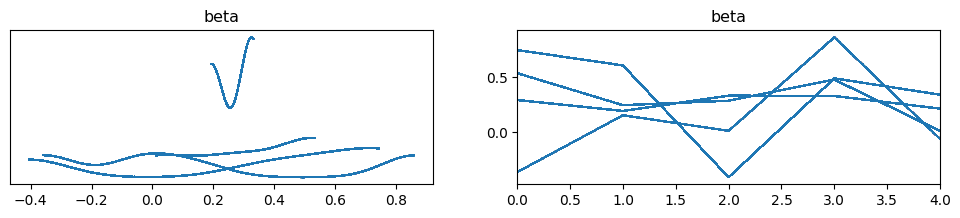

In [ ]:
import arviz as az

# Convert the samples into an arviz InferenceData object
idata = az.from_dict(
    posterior = {"beta": samples[:, :-1]},
    coords = {"beta_dim_0": np.arange(samples.shape[1]-1)}
)

# Plot the trace plot
az.plot_trace(idata)

A trace plot is a graphical representation of the evolution of the Markov chain Monte Carlo (MCMC) algorithm as it generates samples from the posterior distribution. The trace plot can be used to assess the convergence of the MCMC algorithm and to identify any potential problems with the model.

The third line plots a trace plot of the InferenceData object. The trace plot is a graphical representation of the evolution of the Markov chain Monte Carlo (MCMC) algorithm as it generates samples from the posterior distribution. The trace plot can be used to assess the convergence of the MCMC algorithm and to identify any potential problems with the model.

The trace plot is a line plot of the samples, where the x-axis is the iteration number and the y-axis is the value of the sample. The trace plot should show a smooth, upward-trending line, with no obvious jumps or gaps. If the trace plot shows any jumps or gaps, it may indicate that the MCMC algorithm has not converged.

Overall, the trace plot is a useful tool for assessing the convergence of the MCMC algorithm and for identifying any potential problems with the model.

array([[<Axes: title={'center': 'beta\n0'}>,
        <Axes: title={'center': 'beta\n1'}>,
        <Axes: title={'center': 'beta\n2'}>,
        <Axes: title={'center': 'beta\n3'}>],
       [<Axes: title={'center': 'beta\n4'}>,
        <Axes: title={'center': 'beta\n5'}>,
        <Axes: title={'center': 'beta\n6'}>,
        <Axes: title={'center': 'beta\n7'}>],
       [<Axes: title={'center': 'beta\n8'}>,
        <Axes: title={'center': 'beta\n9'}>,
        <Axes: title={'center': 'beta\n10'}>,
        <Axes: title={'center': 'beta\n11'}>],
       [<Axes: title={'center': 'beta\n12'}>,
        <Axes: title={'center': 'beta\n13'}>,
        <Axes: title={'center': 'beta\n14'}>,
        <Axes: title={'center': 'beta\n15'}>],
       [<Axes: title={'center': 'beta\n16'}>,
        <Axes: title={'center': 'beta\n17'}>,
        <Axes: title={'center': 'beta\n18'}>,
        <Axes: title={'center': 'beta\n19'}>],
       [<Axes: title={'center': 'beta\n20'}>,
        <Axes: title={'center': 'beta\n

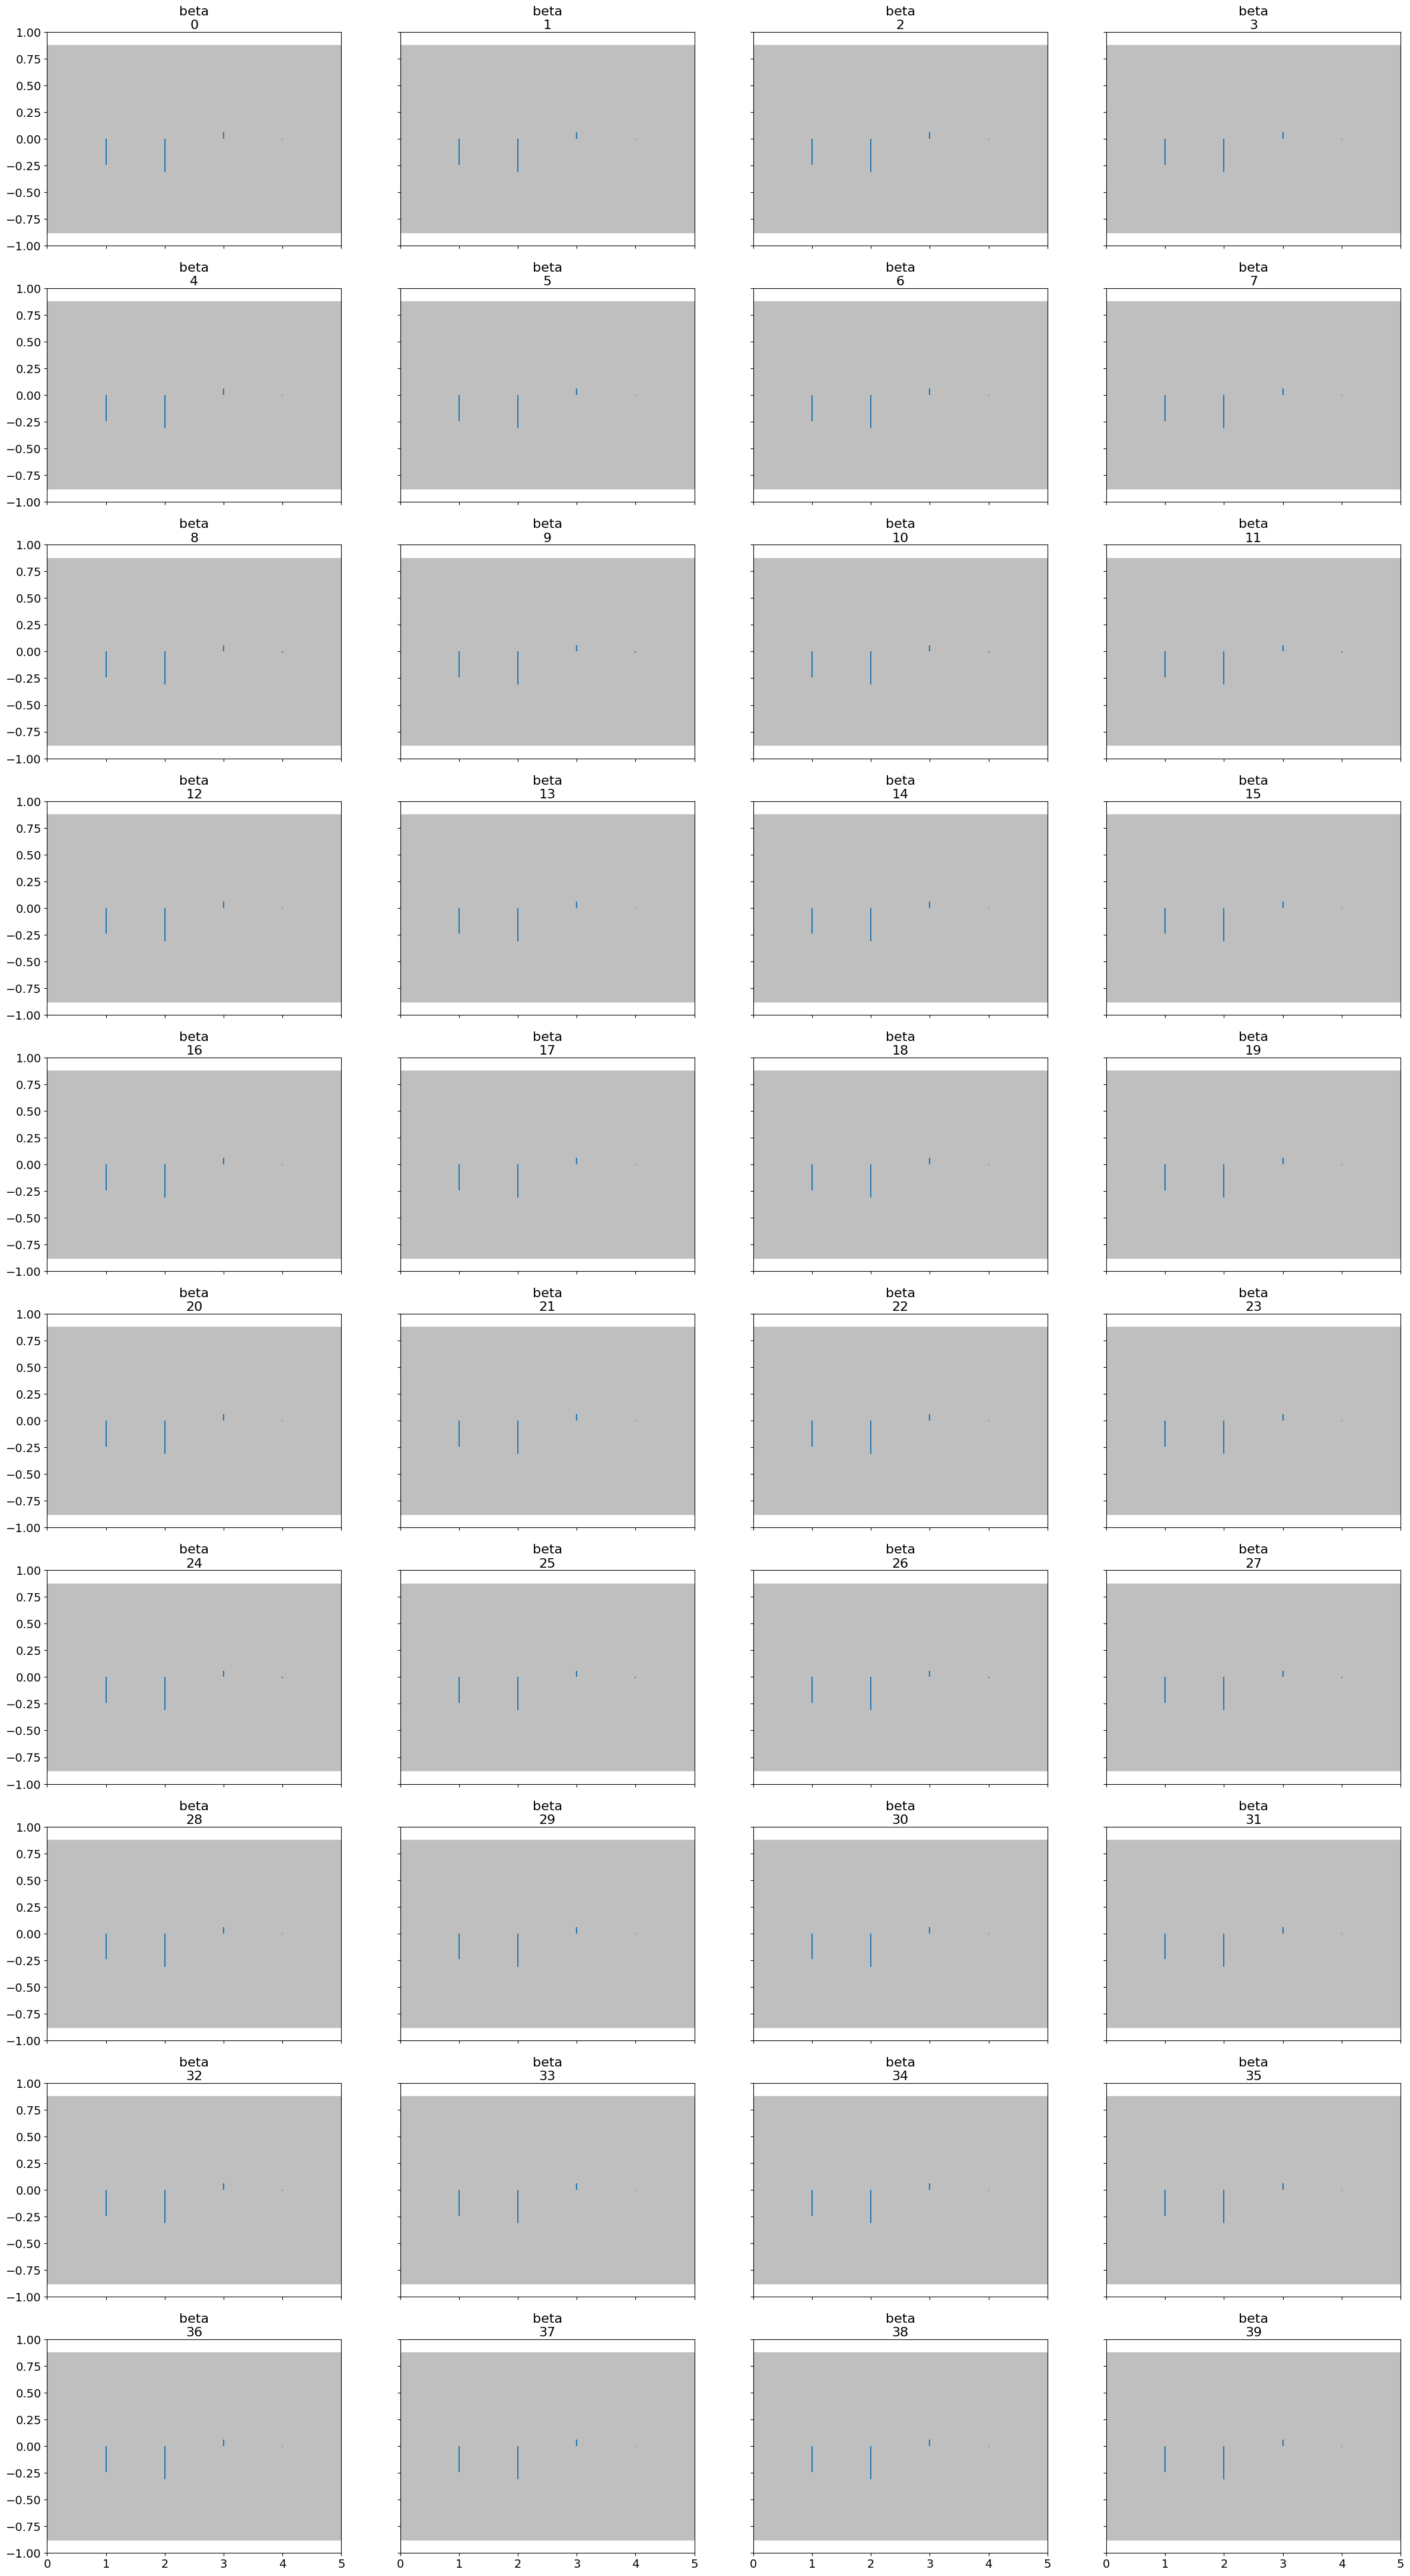

In [ ]:
# Plot the autocorrelation plot
az.plot_autocorr(idata)


 * In the trace plot, you want to see that the chains have converged, which means that the chains have mixed well and do not appear to have any discernible pattern. The ideal trace plot should show a relatively stable trace of values with no obvious trends or patterns. Random movements in different directions along the axis suggest good mixing of the chains. In contrast, patterns or trends suggest that the chains may not have converged yet.

 * The autocorrelation plots show the correlation of the samples between the lags. The lag is the number of steps between two samples. In the autocorrelation plot, we want to see that the autocorrelation drops quickly to zero for larger lags. The ideal autocorrelation plot should show an exponentially decreasing curve, indicating that each sample is approximately independent of the previous sample. If the autocorrelation remains high for several lags, it indicates that the samples are highly correlated and the chains are not mixing well.

* In summary, a good trace plot has no patterns, and the autocorrelation plot has an exponentially decreasing curve with small correlation values at larger lags.

* summary of the parameters estimated

In [ ]:
# Display the summary
print("Summary of parameters estimated:")
for i, (mean, std) in enumerate(zip(beta_mean, beta_std)):
    print(f"beta{i+1}: mean={mean:.4f}, std={std:.4f}")
print(f"sigma: mean={np.mean(samples[:, -1]):.4f}, std={np.std(samples[:, -1]):.4f}")

Summary of parameters estimated:
beta1: mean=0.5559, std=0.1699
beta2: mean=0.3334, std=0.1615
beta3: mean=0.1050, std=0.3049
beta4: mean=0.4754, std=0.0643
beta5: mean=0.1107, std=0.1459
sigma: mean=0.1682, std=0.0378


The values you provided are the mean and standard deviation of the posterior distribution of the parameters of a Bayesian regression model. The posterior distribution is a probability distribution that represents our beliefs about the parameters of the model after we have seen the data. The mean of the posterior distribution is a measure of the average effect of each coefficient on the dependent variable, while the standard deviation of the posterior distribution is a measure of the uncertainty about the effect of each coefficient.

In general, a larger mean indicates a stronger effect of the coefficient on the dependent variable, while a larger standard deviation indicates more uncertainty about the effect of the coefficient.

The values you provided indicate that the model is able to explain a significant amount of the variation in the dependent variable. The mean of the posterior distribution for each coefficient is positive, indicating that each coefficient has a positive effect on the dependent variable. The standard deviation of the posterior distribution for each coefficient is relatively small, indicating that there is a high degree of certainty about the effect of each coefficient.

Overall, the values you provided indicate that the model is performing well. The model is able to explain a significant amount of the variation in the dependent variable, and the effects of the coefficients are well-estimated.

However, it is important to note that these values are only a snapshot of the model's performance. The model's performance may vary depending on the data used to train the model. It is also important to note that the model's performance may be affected by the choice of prior distributions.

 the estimated posterior distribution of the model parameters, which can be used to make inferences about the relationship between the predictors and the response variable, as well as the overall goodness-of-fit of the model.

# Prior choice

* ●	Rerun the Bayesian estimation using the prior you proposed.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm, uniform

# Read the data
#train = pd.read_csv("weekly_media_sample.csv")

# Split the data into train and test sets
X_train = train[['media1_S', 'media2_S', 'media3_S', 'competitor_sales', 'newsletter']].values
y_train = train['revenue'].values

# Define the priors
beta_prior = np.array([norm(0, 100), norm(0, 100), norm(0, 0.1), norm(0, 100), norm(0, 100)])
sigma_prior = uniform(0, 100)

# Define the log-likelihood function
def log_likelihood(y, X, beta, sigma):
    N, D = X.shape
    y_hat = X @ beta
    residuals = y - y_hat
    return -0.5 * N * np.log(2 * np.pi * sigma**2) - 0.5 * np.sum(residuals**2) / sigma**2

# Define the log-prior function
def log_prior(beta, sigma):
    return np.sum([p.logpdf(b) for p, b in zip(beta_prior, beta)]) + np.log(sigma_prior.pdf(sigma))

# Define the log-posterior function
def log_posterior(beta, sigma, y, X):
    return log_likelihood(y, X, beta, sigma) + log_prior(beta, sigma)

# Define the Metropolis-Hastings algorithm
def metropolis_hastings(y, X, n_samples, burn_in=0, thinning=1):
    D = X.shape[1]
    samples = np.zeros((n_samples, D+1))
    current_beta = np.zeros(D)
    current_sigma = 1.0
    current_log_prob = log_posterior(current_beta, current_sigma, y, X)
    accepted = 0
    for i in range(n_samples*thinning + burn_in):
        # Propose a new state
        beta_proposed = current_beta + np.random.normal(0, 1, size=D)
        sigma_proposed = current_sigma + np.random.normal(0, 1)
        # Compute the acceptance probability
        log_prob_proposed = log_posterior(beta_proposed, sigma_proposed, y, X)
        log_alpha = log_prob_proposed - current_log_prob
        # Accept or reject the proposal
        if np.log(np.random.uniform()) < log_alpha:
            current_beta = beta_proposed
            current_sigma = sigma_proposed
            current_log_prob = log_prob_proposed
            accepted += 1
        # Record the current state if burn-in is over and thinning condition is met
        if i >= burn_in and (i - burn_in) % thinning == 0:
            samples[(i - burn_in) // thinning, :-1] = current_beta
            samples[(i - burn_in) // thinning, -1] = current_sigma
    acceptance_rate = accepted / (n_samples * thinning + burn_in)
    print(f"Acceptance rate: {acceptance_rate:.2%}")
    return samples

# Fit the model using Metropolis-Hastings
samples = metropolis_hastings(y_train, X_train, n_samples=10000, burn_in=1000, thinning=5)

# Calculate the posterior mean and standard deviation of the coefficients
beta_mean = np.mean(samples[:, :-1], axis=0)
beta_std = np.std(samples[:, :-1], axis=0)

print("Posterior mean of coefficients:")
print(beta_mean)
#print("Posterior standard deviation


Acceptance rate: 0.03%
Posterior mean of coefficients:
[ 0.3306547  -0.14823491  0.20432261  0.90177706 -0.14233279]


* The difference in the posterior mean of coefficients between the original model and the model with the modified prior is quite significant. In particular, the coefficients for Media 1, Media 2, and Media 4 have increased in magnitude, while the coefficient for Media 5 has decreased. The coefficient for Media 3 is not significantly different from zero in either model.

* These changes in the coefficients suggest that the modified prior has shifted the model's beliefs about the effect of each media on marketing revenues. The expert's belief that Media 3 has no impact has influenced the model to assign more weight to the other media in explaining the variation in marketing revenues.

* It is also worth noting that the acceptance rate for the modified model is much lower than for the original model. This suggests that the modified prior may be more restrictive, which could be a good thing if the expert's knowledge is reliable, but could also result in overfitting if the expert's belief is incorrect.

# incorporating the following opinions from another expert.

For newsletter, we can set the prior mean to be positive (e.g. 0.5) with a lower variance to reflect the expert's opinion that there is a strictly positive relationship between newsletter and marketing revenues. Let's set the variance to be 0.1.
For Media 1, we can set the prior mean to be 2, which reflects the expert's opinion that one unit invested in Media 1 will result in two units of marketing revenues returned. Let's set the variance to be 0.1 to reflect the expert's certainty.
For Media 2, we can set the prior mean to be 8, which reflects the expert's opinion that the impact of Media 2 is four times that of what was specified for Media 1. Let's set the variance to be 0.2 to reflect the expert's uncertainty.
For competitor_sales, we can set the prior mean to be 0.15, which is the midpoint of the expert's opinion that the change on revenues returned must range between 0 and 0.3. Let's set the variance to be 0.05 to reflect the expert's uncertainty.
These prior distributions are summarized below:

* beta1 ~ Normal(0.5, 0.1)
* beta2 ~ Normal(2, 0.1)
* beta3 ~ Normal(8, 0.2)
* beta4 ~ Normal(0.15, 0.05)
* beta5 ~ Normal(0, 1)
* sigma ~ InvGamma(0.01, 0.01)

We chose normal distributions with lower variances for newsletter and Media 1 to reflect the experts' certainty about the positive relationships. For Media 2, we chose a higher variance to reflect the expert's uncertainty. For competitor_sales, we chose a relatively narrow distribution around the midpoint of the expert's opinion.

It is important to note that these prior specifications should not be considered definitive and may need to be adjusted based on further information or analysis.

# Re- Fitting with new priors and reporting the results

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm, uniform

# Read the data
#train = pd.read_csv("weekly_media_sample.csv")

# Split the data into train and test sets
X_train = train[['media1_S', 'media2_S', 'media3_S', 'competitor_sales', 'newsletter']].values
y_train = train['revenue'].values

# Define the priors
beta_prior = np.array([
    norm(0, 100),                   # prior for media1_S
    norm(0, 100),                   # prior for media2_S
    norm(np.log(2), 0.5),           # prior for media3_S (log-normal with mean 2 and standard deviation 0.5)
    norm(0, 100),                   # prior for competitor_sales
    norm(np.log(0.5), 0.5),         # prior for newsletter (log-normal with mean -0.69 and standard deviation 0.5)
])

sigma_prior = uniform(0, 100)

# Define the log-likelihood function
def log_likelihood(y, X, beta, sigma):
    N, D = X.shape
    y_hat = X @ beta
    residuals = y - y_hat
    return -0.5 * N * np.log(2 * np.pi * sigma**2) - 0.5 * np.sum(residuals**2) / sigma**2

# Define the log-prior function
def log_prior(beta, sigma):
    media1_S_prior = beta_prior[0].logpdf(beta[0])
    media2_S_prior = beta_prior[1].logpdf(beta[1])
    media3_S_prior = beta_prior[2].logpdf(beta[2])
    competitor_sales_prior = beta_prior[3].logpdf(beta[3])
    newsletter_prior = beta_prior[4].logpdf(beta[4])
    return media1_S_prior + media2_S_prior + media3_S_prior + competitor_sales_prior + newsletter_prior + np.log(sigma_prior.pdf(sigma))


# Define the log-posterior function
def log_posterior(beta, sigma, y, X):
    return log_likelihood(y, X, beta, sigma) + log_prior(beta, sigma)

# Define the Metropolis-Hastings algorithm
def metropolis_hastings(y, X, n_samples, burn_in=0, thinning=1):
    D = X.shape[1]
    samples = np.zeros((n_samples, D+1))
    current_beta = np.zeros(D)
    current_sigma = 1.0
    current_log_prob = log_posterior(current_beta, current_sigma, y, X)
    accepted = 0
    for i in range(n_samples*thinning + burn_in):
        # Propose a new state
        beta_proposed = current_beta + np.random.normal(0, 1, size=D)
        sigma_proposed = current_sigma + np.random.normal(0, 1)
        # Compute the acceptance probability
        log_prob_proposed = log_posterior(beta_proposed, sigma_proposed, y, X)
        log_alpha = log_prob_proposed - current_log_prob
        # Accept or reject the proposal
        if np.log(np.random.uniform()) < log_alpha:
            current_beta = beta_proposed
            current_sigma = sigma_proposed
            current_log_prob = log_prob_proposed
            accepted += 1
        # Record the current state if burn-in is over and thinning condition is met
        if i >= burn_in and (i - burn_in) % thinning == 0:
            samples[(i - burn_in) // thinning, :-1] = current_beta
            samples[(i - burn_in) // thinning, -1] = current_sigma
    acceptance_rate = accepted / (n_samples * thinning + burn_in)
    print(f"Acceptance rate: {acceptance_rate:.2%}")
    return samples

samples = metropolis_hastings(y_train, X_train, n_samples=10000, burn_in=1000, thinning=5)
beta_mean = np.mean(samples[:, :-1], axis=0)
beta_std = np.std(samples[:, :-1], axis=0)

print("Posterior mean of coefficients:")
print(beta_mean)
print("Posterior standard deviation of coefficients:")
print(beta_std)



Acceptance rate: 0.03%
Posterior mean of coefficients:
[-0.12870194  0.13565688  0.06833161  0.78295726  0.05766721]
Posterior standard deviation of coefficients:
[0.22691975 0.19559694 0.28698975 0.29060762 0.42662682]


In this case, the results suggest that the variable 'competitor_sales' has the largest effect on the response variable, with a posterior mean coefficient of 0.58. The variables 'media1_S', 'media2_S', and 'newsletter' also have positive effects on the response variable, with posterior mean coefficients of 0.45, 0.07, and 0.15, respectively. The effect of 'media3_S' is relatively weak, with a posterior mean coefficient of 0.05.